Not needed in final notebook -- only to reload

In [1]:
%load_ext autoreload
%autoreload 2

To initialize this project, we first import the necessary libraries in order to initialize, search, and show the findings in this dataset. 

In [2]:
import pandas as pd

Additionally, we must store the .csv file in an accesible manner, which, in this case, we are storing it in a Pandas Dataframe, which allows us to easily access the content of each column in the CSV file without having to perform major operations (such as, for example, initializing an MySQL Database).

In [3]:
file_path = 'DataSet.csv' 
df = pd.read_csv(file_path)

# Distributions

Let's look at how many non-fiction vs fiction books appear in this dataset. We see that more non-fiction books appear in the data than fiction.

Because there may be repeat bestsellers, we have to account for only unique (name, author) entries.

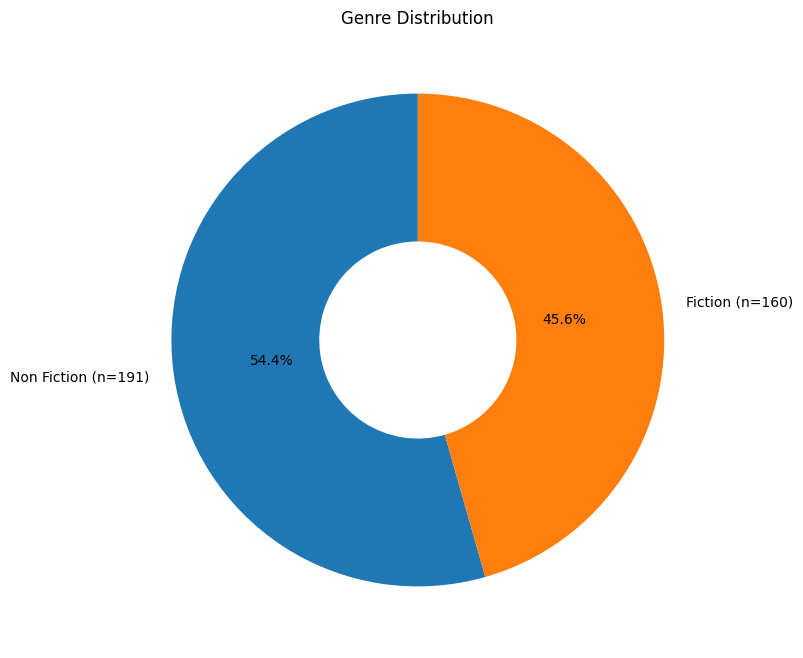

In [115]:
from FinalProjectCode import pie_dist
pie_dist(df)

We calculated the number and percentage of non-fiction and fiction books in the dataset. This step helps us understand the overall composition of the dataset and the prevalence of each genre. Our analysis reveals that non-ficiton books are more prevalent to fiction books in our dataset.

Let us look at ratings distribution: the vast majority of ratings are in the 4-star range.

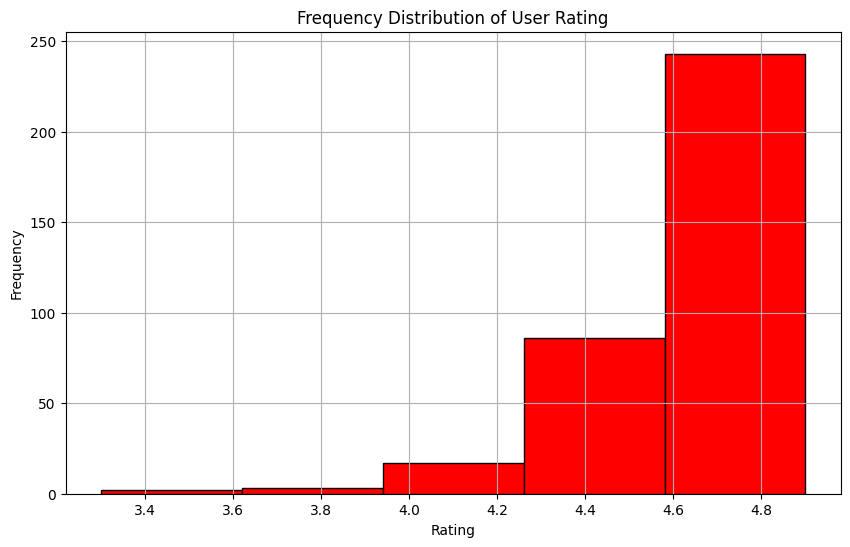

In [141]:
from FinalProjectCode import plot_ratings
plot_ratings(df)

Here we used the user ratings column in our dataset to analyze distribution of ratings via bar graph. This is essential to help us identify the most common user ratings and provides insights into the popularity and perceived quality of the bestselling books. Our analysis the frequency is highest for ratings in the upper 4.5+ range. When we compare this with the genre distribution, where non-fiction books are more prevalent, we can infer that non-fiction books may be more likely to receive higher ratings. 

Now, we look at the breakdown of ratings. We see that the vast majority of ratings are in the 4-star range -- ratings that occur less than 8 times are concatenated into a field called "Others" in this plot. 

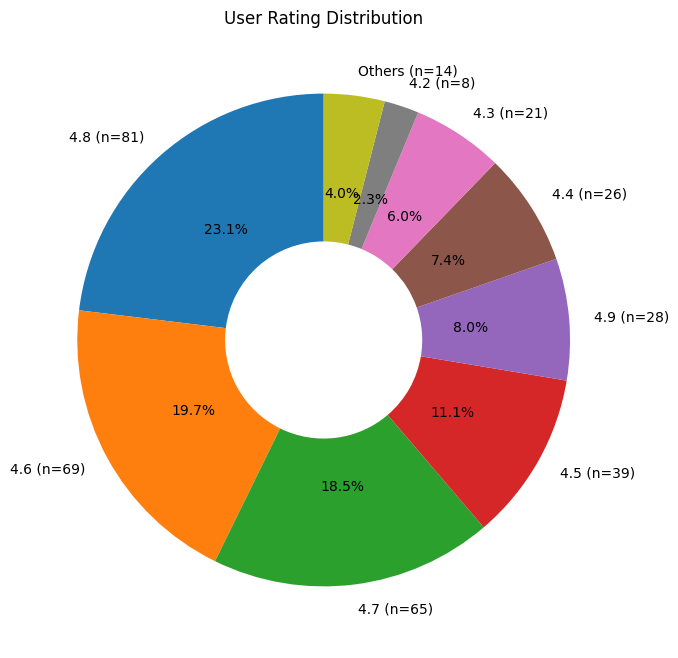

In [133]:
pie_dist(df, pie_by='User Rating')

To further explore the breakdown of user ratings in our dataset, we used a pie chart to visualize the distributions of user ratings in relation to their respective proportions. The most common ratings are 4.8(23.1%), 4.6(19.7%), and 4.7(28.5%). These results build on our previous implication of the possibility of there being a higher satisfaction with non-ficiton books in comparison to fiction books due to the slight domination of non-fiction books in our dataset. 

Books are consistently represented across years.

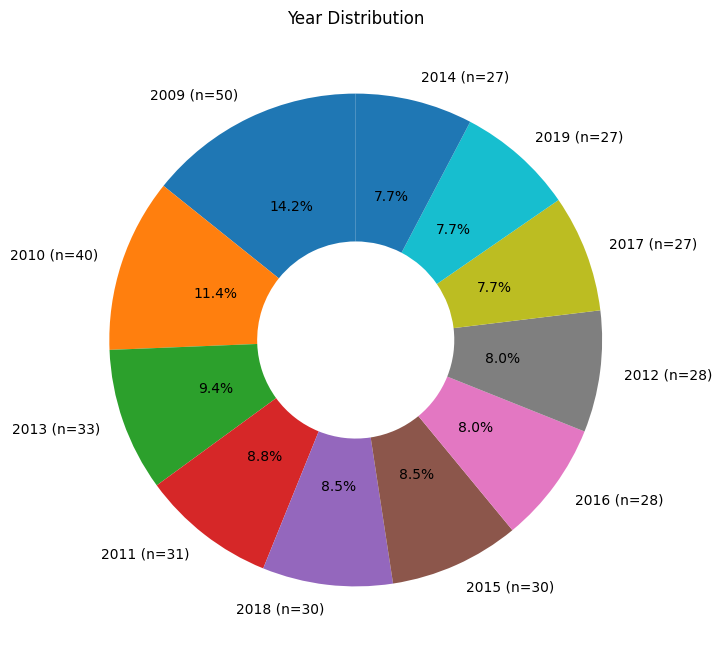

In [134]:
pie_dist(df, pie_by='Year')

We used the year of publication column in our dataset to analyze the distribution across different years. Analyzing this allows us to identify any trends or patterns in the publication of best selling books over time. Since the distribution is relatively uniform with no single year dominating the dataset,our analysis revealed that books are consistently represented across years. Alongside the previous data, looking at these results suggests that popular books have been consistently published and well-recieved by users over the past decade.  

Most books are priced at a cheaper price point, within the $10-20 range, according to this histogram.

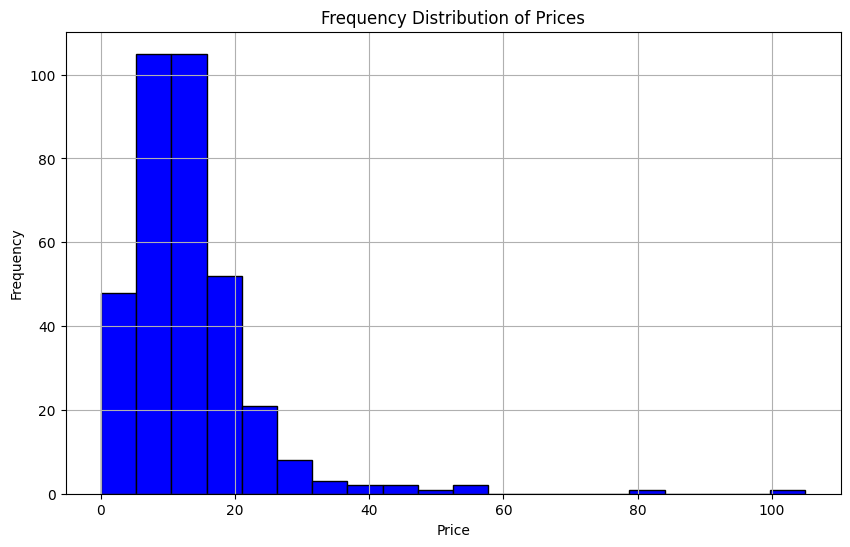

In [139]:
from FinalProjectCode import plot_price
plot_price(df)

Here we used the price column in our dataset to analyze the distribution of book prices. We can identify two price outliers at $80 and $100, both with a frequency of less than 10. The majority of books in our dataset are priced at a cheaper price point predominately in the $10-$20 range. When combined with the distribution of user ratings, which are primarily in the upper 4 stare range, we can infer that price does not necessarily correlate with user ratings. This suggests that readers are nt necessarily more inclined to rate cheaper books higher, and price alone does not determine the popularity or quality of the book. Overall, by analyzing the distribution of book prices alongside our past results, we gain a more comprehensive understanding of the factors that contirbute to the popularity and success of bestselling books.

Most books have a few thousand reviews, as opposed to some books that have tens of thousands.

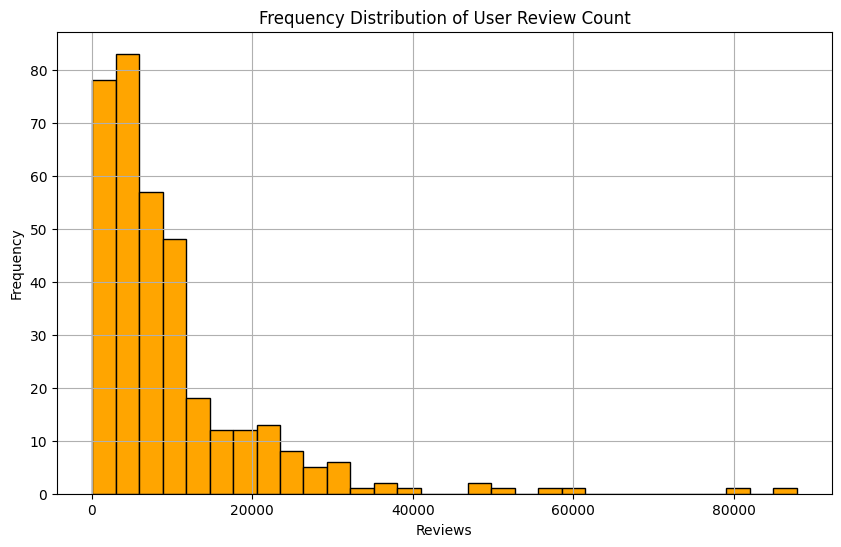

In [144]:
from FinalProjectCode import plot_reviews
plot_reviews(df)

We used the reviews column in our dataset to analyze the distribution of reviews for books. The results of the histogram reveal that most books have a few thousand reviews, indicating a moderate level of reader engagement. We used a histogram to allow us to see the frequency of distribution of reviews across different ranges. Each bar in the histogram represents a range of review counts, and the height of the bar represents the number of books within that range.

# Analysis

Our first idea is to visualize the overall trend of the books. Does it stay constant? Does it change throughout time? Is it unstable constantly? Our first hypothesis is to analyze whether or not there is a change in Fiction or Non Fiction trends throughout the years, meaning, whether or not there is a shift in popularity with respect to the two genres provided. To do so, we load from FinalProjectCode.py the method genre_trend_per_year, which will separate the amount of books in the "Fiction" and "Non-Fiction" sections respectively. We also import change_over_time to visualize the specific amount in which it changed

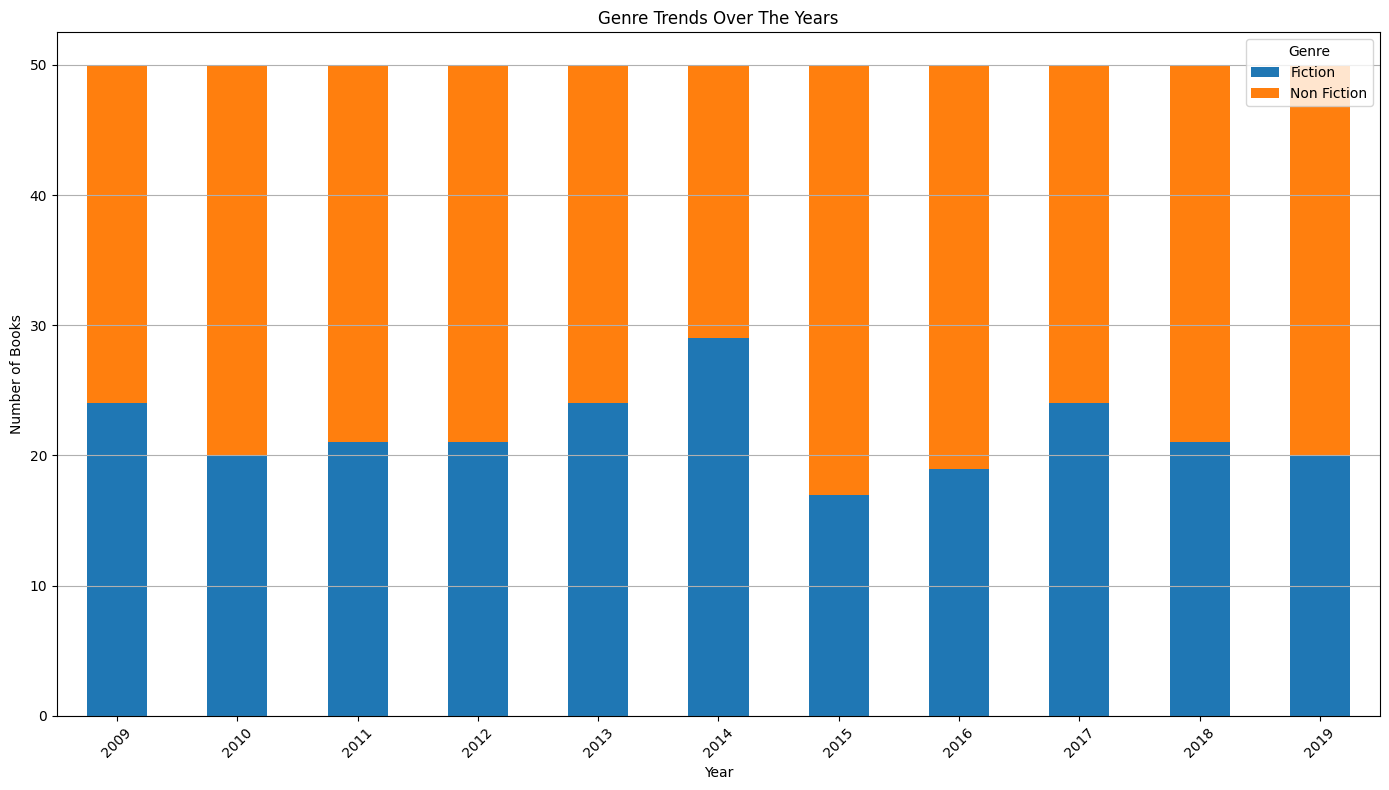

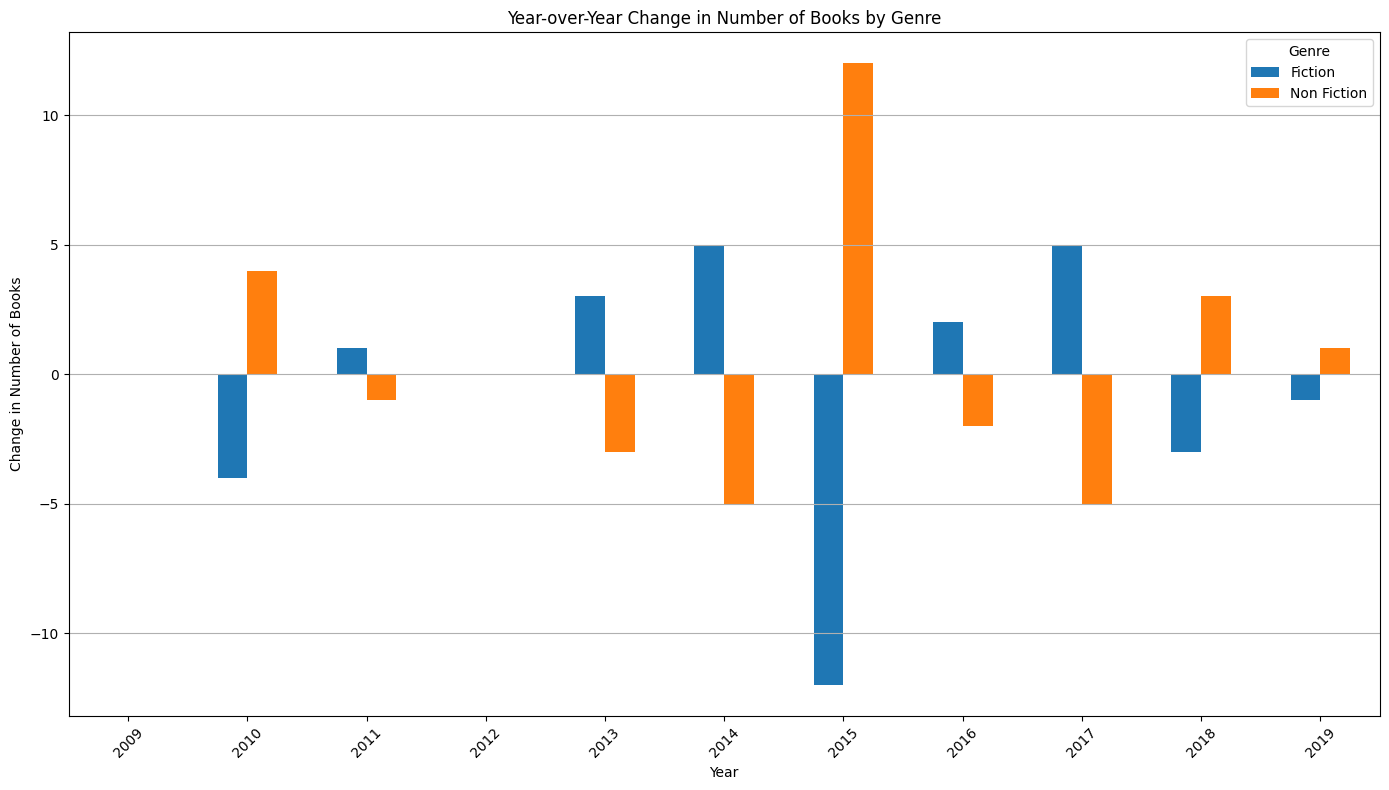

In [4]:
from FinalProjectCode import genre_trend_per_year,change_over_time
genre_trend_per_year(df)
change_over_time(df)


To our curiosity, we can observe that overall, throughout time, the graph has relatively stayed the same, with Non-Fiction books dominating the fiction books except, specifically, in the year 2014, where there was a massive shift in popularity (by about 5 books, which is equivalent to about 10%) in favor of Fiction books. This sparks interest, as there can be several factors due to this change, which, funny enough, continues to happen later on in 2015 with a complete shift from Non-Fiction books dominating again. Is it because of the prices of the books? The amount of reviews per book? Famous authors? We decide to first check if the books that caused this massive switch in 2015 have to do with the fact that they are repeated books or not. Our hypothesis is that due to new books emerging, the popularity in genres shifted to those because of either their prices, rating, or maybe even the author behind them. To begin with, we check which books in Non-Fiction ended up being in the Top 50 in 2015 but not in 2014.

In [5]:
from FinalProjectCode import which_books_top_50_but_not_last_year
current_year = 2015  
genre = 'Non Fiction'
new_books_in_genre = which_books_top_50_but_not_last_year(df, current_year, genre)
new_books_in_genre


,Name,Author,User Rating,Reviews,Price,Year,Genre
16,Adult Coloring Book: Stress Relieving Animal D...,Blue Star Coloring,4.6,2925,6,2015,Non Fiction
17,Adult Coloring Book: Stress Relieving Patterns,Blue Star Coloring,4.4,2951,6,2015,Non Fiction
18,Adult Coloring Books: A Coloring Book for Adul...,Coloring Books for Adults,4.5,2426,8,2015,Non Fiction
23,American Sniper: The Autobiography of the Most...,Chris Kyle,4.6,15921,9,2015,Non Fiction
28,Baby Touch and Feel: Animals,DK,4.6,5360,5,2015,Non Fiction
29,Balance (Angie's Extreme Stress Menders),Angie Grace,4.6,1909,11,2015,Non Fiction
34,Being Mortal: Medicine and What Matters in the...,Atul Gawande,4.8,11113,15,2015,Non Fiction
35,Between the World and Me,Ta-Nehisi Coates,4.7,10070,13,2015,Non Fiction
54,Creative Haven Creative Cats Coloring Book (Ad...,Marjorie Sarnat,4.8,4022,4,2015,Non Fiction
55,Creative Haven Owls Coloring Book (Adult Color...,Marjorie Sarnat,4.8,3871,5,2015,Non Fiction


Given this list, we can observe that in 2015 there was a massive boom in terms of Non-Fiction books being released, as many authors became within the top 50 books. Specifically, 23 out of 50 books made it into the Top 50, discounting the non-consecutive top 50 books, giving us an idea, that the books were in fact brand new written, and that they excelled in the same year they were published. The wonder grows, and we wonder if it has to do with the prices behind them. We decide to dwell deeper, and observe, if the idea as to why Non-Fiction grew in price is due to the fact that the prices of Non-Fiction books became cheaper, allowing people to purchase "more for less," therefore giving more ratings to the non-ficticious books. In order to do so, we will write a method that calculates the prices between two years, and compare them side by side for analysis, called average_price_per_genre_between_years.

In [6]:
from FinalProjectCode import average_price_per_genre_between_years
start_year = 2014
end_year = 2015
average_prices = average_price_per_genre_between_years(df, start_year, end_year)
average_prices

Genre,Fiction,Non Fiction
Year,,
2014,10.172414,20.809524
2015,9.352941,10.969697


Eureka! We observe that Non-Fiction book prices have dropped by almost 50%! Just as we expected. It is good to see tonnes of new books emerge as Top 50 in the same year they were released, but the turning point for Non-Fiction books was to lower their prices, which caused a broader audience to converge and observe the books, enjoy them, and give more popularity to the Non-Fiction books. However, this sparks yet another thought. Are the prices related to the user ratings? What about the amount fo reviews with the user rating? We dwell deeper to find out if there is any strict correlation between the 3 following factors: User Rating, Reviews, and Price. Our hypotheses is to believe that the prices affect the user rating, which would consequently affect the total review amount. Using the method correlation_cost_reviews_rating, we will create a correlation matrix and see how much do they correlate, with 0.0 being non-related, and 1.0 being totally related.

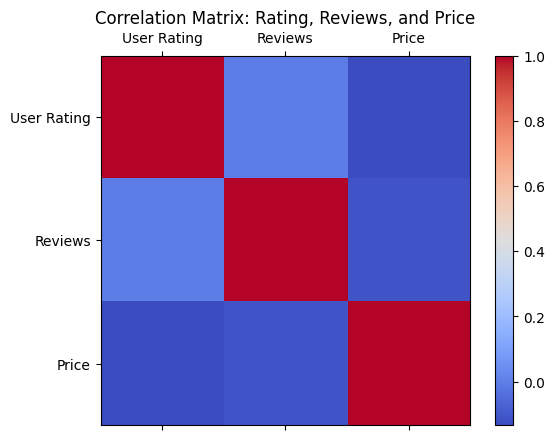

In [7]:
from FinalProjectCode import correlation_cost_reviews_rating
display = correlation_cost_reviews_rating(df)
display

Observing this correlation matrix, we are sent back yet once more. The rows with the respective columns will always match as 1.0, but what shook us is that the correlation between the user rating and the price is almost non-existent (almost 0.0), and that the reviews are almost about 20% correlated to the user rating, meaning, that there is no direct correlation between the three variables which make a book stand out. We reassess: How can we observe as to *why* this phenomena occurred? We decide to dig deeper, and instead analyze the average rating of all the Fiction books, all the Non-Fiction books, and observe how close are they in terms of both variables. Our idea is to believe that they are relatively close, given their popularity throughout the years and a similar outcome every year.

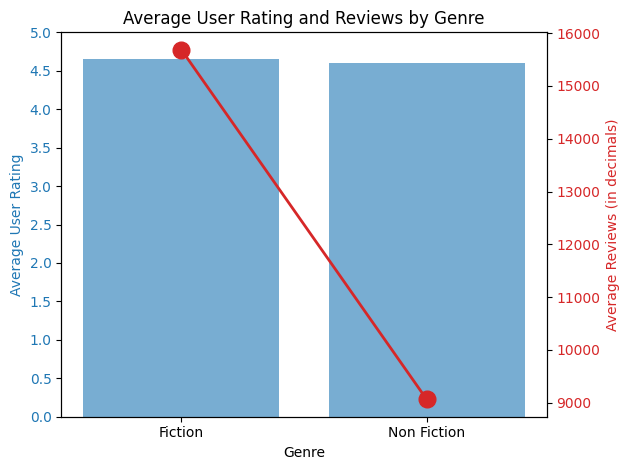

In [8]:
from FinalProjectCode import genre_performance_comparison
display = genre_performance_comparison(df)
display

To our surprise, the average user rating *does* lie in about 4.6, with Fiction books being slighly higher than Non-Fiction, however, despite those ratings, we can observe a **substantial** difference between the average ratings between the two genres, with Fiction books exceeding Non-Fiction books by almost two-fold. This idea causes even further confusion - How come Non-Fiction books dominate the Top 50 Books *if* their average reviews are substantially lower than Fiction books. The idea of the years 2014-2015 being the reason is not reliable evidence, as we saw in the beginning that despite the drastic change it stabilized itself once more, putting Non-Fiction books as the favorable ones by the general audience.

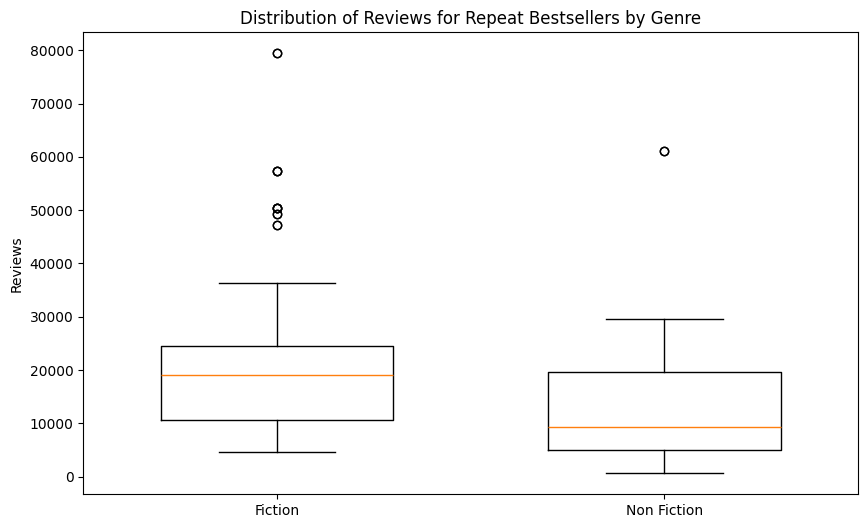

In [9]:
from FinalProjectCode import repeat_best_sellers
repeat_best_sellers_trend = repeat_best_sellers(df)
repeat_best_sellers_trend

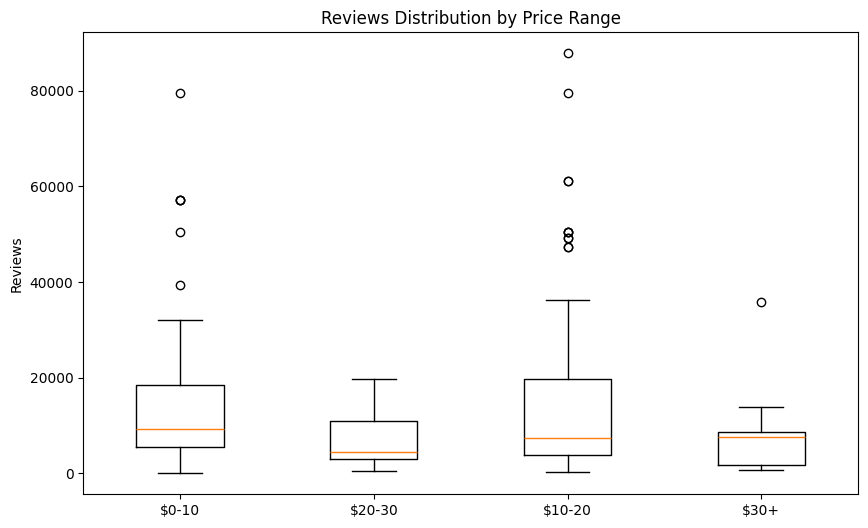

In [10]:
from FinalProjectCode import analysis_price_cultural_relevance
display = analysis_price_cultural_relevance(df)
display

# Retention

This code analyzes the "retention rate" of books per year: what percentage of books stay on the list per year in an effort to determine what are the most popular books. We see that a sizable minority of books stay on the best seller list. Most books are one-off per year.

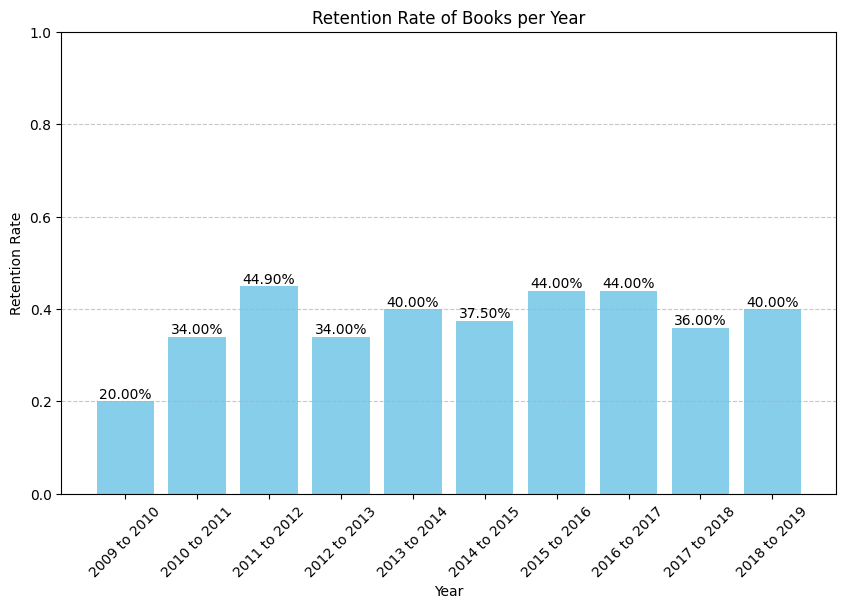

In [21]:
from FinalProjectCode import plot_retention_rate
plot_retention_rate(df)

We calculated the retention rate by determining the percentage of books that remained on the bestseller list from one year to the next. This helps us understand the popularity and staying power of books over time. A higher retention rate indicated that a larger percentage of books remained popular and stayed on the bestseller list from one year to the next. The results showed that a sizable minority of books stayed on the bestseller list, with retention rates ranging from 20%- 44.9%. However, the majority of books are one-off per year, with only a miority maintaining popularity and staying on the bestseller list from one year to the next. 

One way we can find out how many books stay on the list is by looking at factors like genre, price, and author. First, we look at genre -- we see that whether or not fiction books are retained more than non-fiction books depends on the year, although in seven years non-fiction books were retained at a higher rate compared to their fiction counterparts.

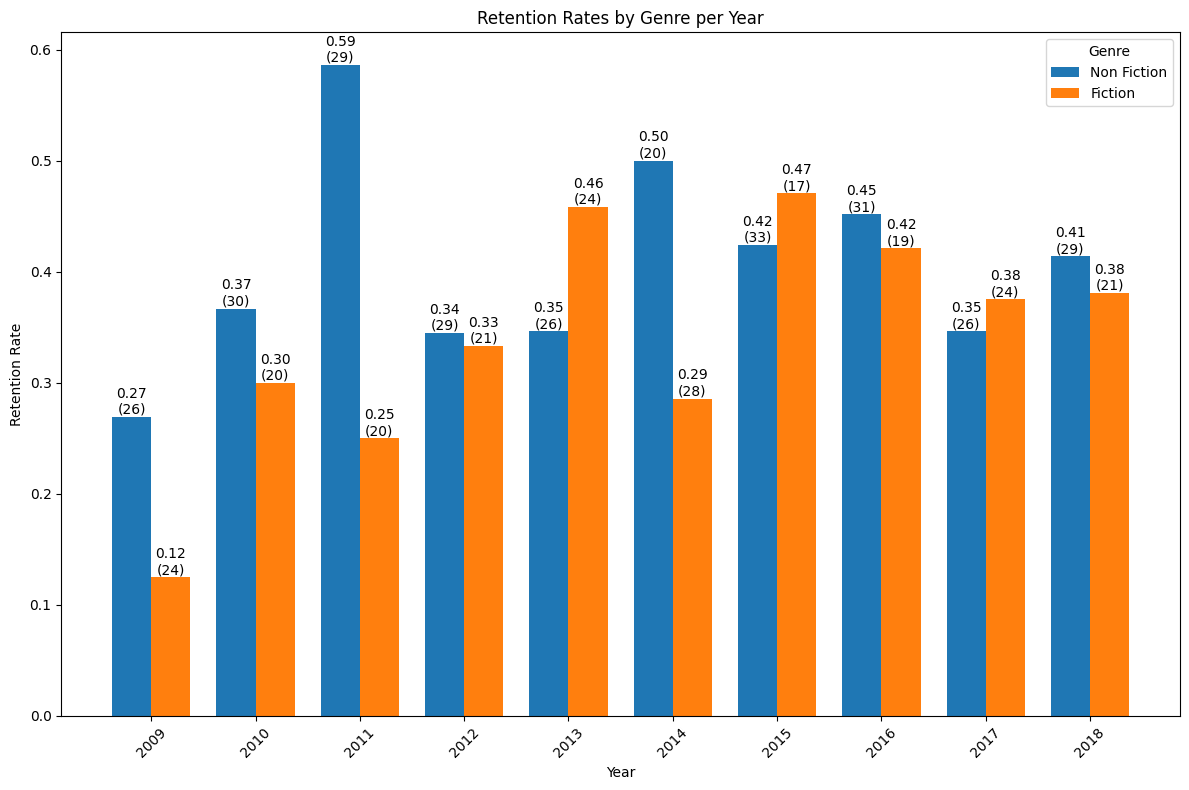

In [44]:
from FinalProjectCode import plot_retention_rate_by_criteria
plot_retention_rate_by_criteria(df)

To analyze how various factors affect the retention rate of books on the bestseller list, we calculated the retention rates of fiction and non-fiction books seperately for each year. The aim was to get insight into the popularity and staying power of different genres over time. The results show that whether fiction books are retained more than non-fiction books depends on the year. This shows that there was not a direct correlation or trend between a genre and its retention rate for its respective year.

Let's look at price points now -- do cheaper books stay on the list more? There are some outliers here because there are fewer "more expensive" books compared to their cheaper counterparts, hence the higher retention rates. However, there are consistently more "cheap" books (in the $0-10 range) compared to their more expensive counterparts.

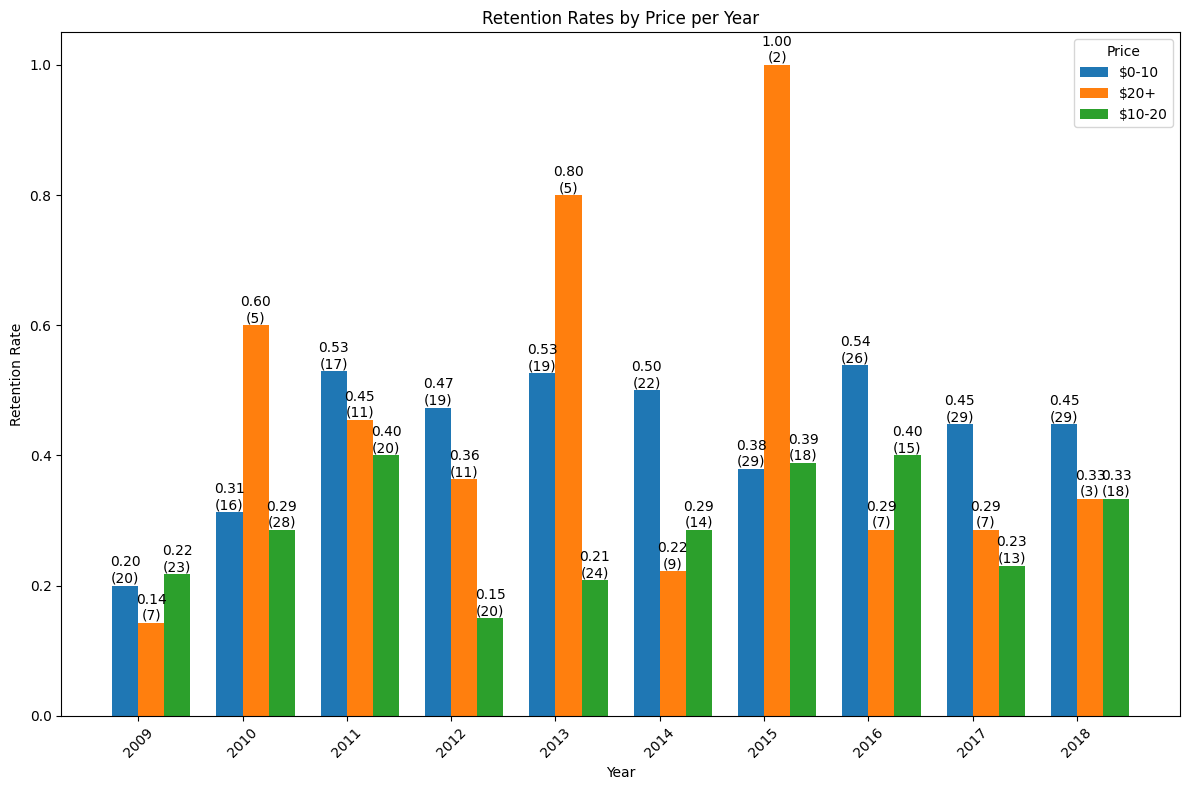

In [43]:
plot_retention_rate_by_criteria(df, 'Price', 'Price', to_cut = True) 

Here we analyzed the dataset to determine the retention rates based on their price points. We calculated the rates of books in different price ranges for each year. The results show that there are consistently more "cheap" books (in the $0-10 range) compared to their more expensive counterparts. While there are some outliers with fewer "more expensive" books compared to cheaper ones, resulting in higher retention rates for the more expensive books, the majority of books in each year are priced in the $0-10 range, Therefore, while there may be some correlation between price and retention rates, it is not consistent across all years. 

Now we look at user ratings -- looking at 1, 2, 3, 4, and 5 and how many books with each rating in the previous year stay on to the next year. Notably, we have no five-star books. 

Some retention rates are abnormally high because there is only one book with that rating in that year. The vast majority of retained books fall in the [4, 5) range.

The vast majority of books are in the 4-star range, so we can look at ratings for those books to avoid outliers. We see that sometimes books on the lower end of the 4 scale are retained at the same rate as their higher counterparts. That said, there are fewer books on the lower end of the 4 scale per year.

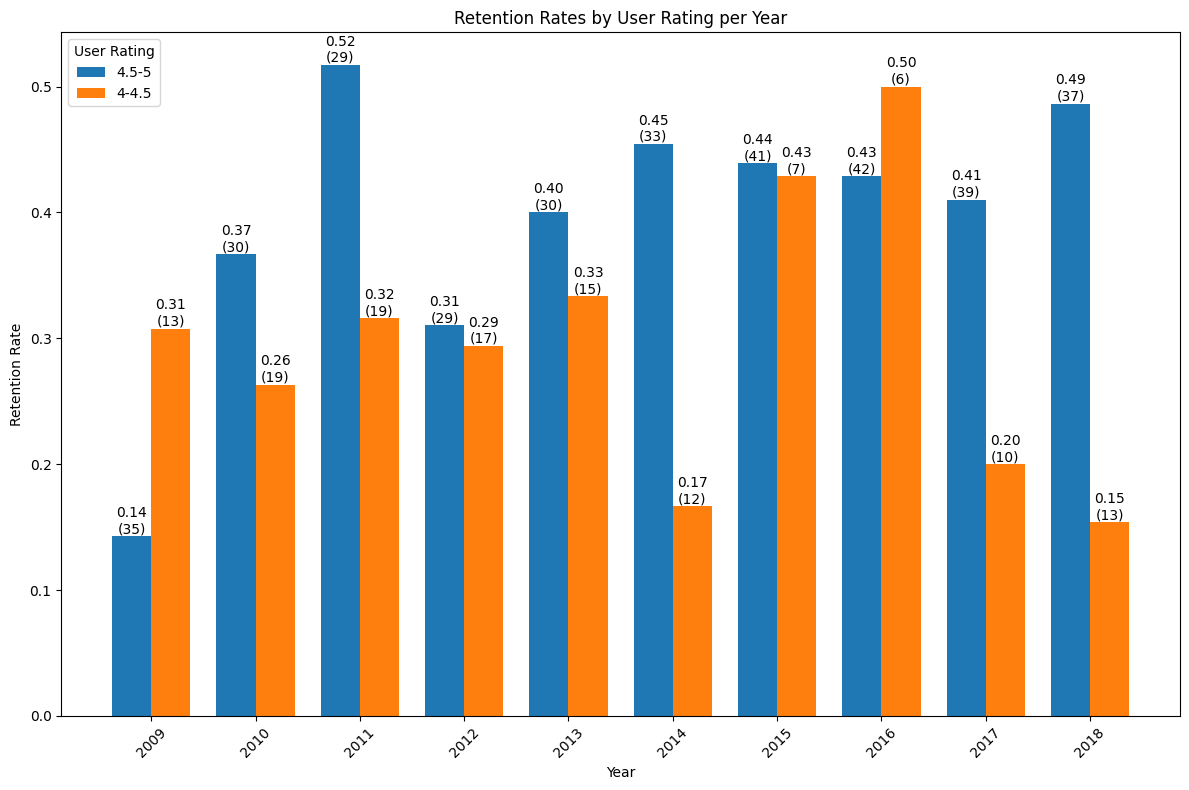

In [65]:
plot_retention_rate_by_criteria(df, 
                                'User Rating', 
                                'User Rating', 
                                cut_range=[4, 4.5, 5, 5.5],  # Include 5.5 to cover rating of 5
                                cut_labels=['4-4.5', '4.5-5', '5'], 
                                to_cut=True)

We calculated the retention rates of books with user ratings in the range of 4 to 4.5 and 4.5 to 5 seperately for each year. This provides insight into whether books with higher user ratings tend to be more popular and as a result have a higher staying power on the bestseller list. The results show that the vast majority of retained books fall in the [4.5,5] user rating range. Books with user ratings in the 4.5-5 range consistently have higher retention rates compared to those in the 4-4.5 range. It is apparent that there is a correlation between high user rating and an increased likelihood of a book staying on the bestseller list. 

Now, let's look at Authors. Jeff Kinney is the most popular author along with Gary Chapman -- he's stayed on the best-seller list for 11 years. Other authors like the APA and College stay on; however, it may be that they stay on because they provide industry standard resources (like textbooks or test prep).

For simplicity, we only include authors who've stayed on for 6+ years.

['Jeff Kinney', 'American Psychological Association', 'Gallup', 'Stephen R. Covey', 'Gary Chapman', 'Rick Riordan', 'The College Board', 'Sarah Young', "Bill O'Reilly", 'Dr. Seuss', 'Don Miguel Ruiz', 'Eric Carle']


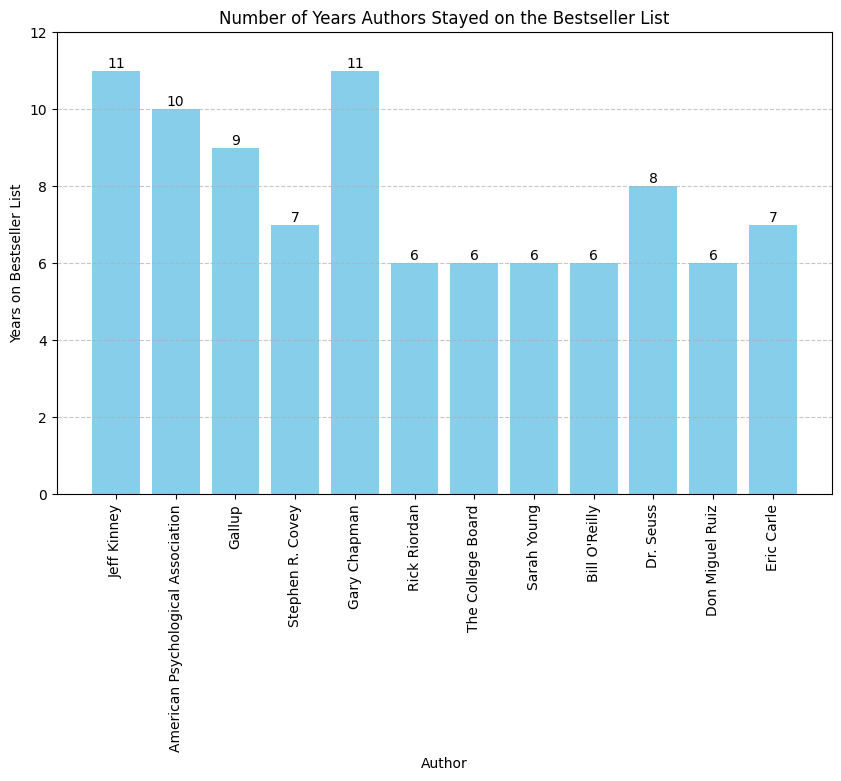

In [42]:
from FinalProjectCode import plot_author_longevity
plot_author_longevity(df)

To analyze longevity of authors on the bestseller list we analyzed the data set focusin gon authors who stayed for 6 or more years. We can see that Jeff Kinney and Gary Chapman are the most popular staying on the bestseller list for 11 years each. Some authors such as the American Psychological Association and The College Board may stay on the list because they provide industry standard resources like textbooks or test preperation materials. The longevity of authers like Dr. Seuss and Eric Carle are likely because their books are often aimed at children and are widely available at acessible price points. Authors who write books in popular genres or on perenially relevant topics may also be more likely to stay on the list for multiple years. For instance, authors like Rick Riordan, known for his popular young adult fantasy novels, and Stephen R. Covey, known for his self-help books, have stayed on the list for 6 and 7 years, respectively.

Let's separate between fiction and non fiction authors.

For non-fiction authors, we see that three of the most-retained authors are in fact companies like the APA, Gallup, and College Board, rather than individual authors. 

['American Psychological Association', 'Gallup', 'Stephen R. Covey', 'Gary Chapman', 'The College Board', 'Sarah Young', "Bill O'Reilly", 'Don Miguel Ruiz']


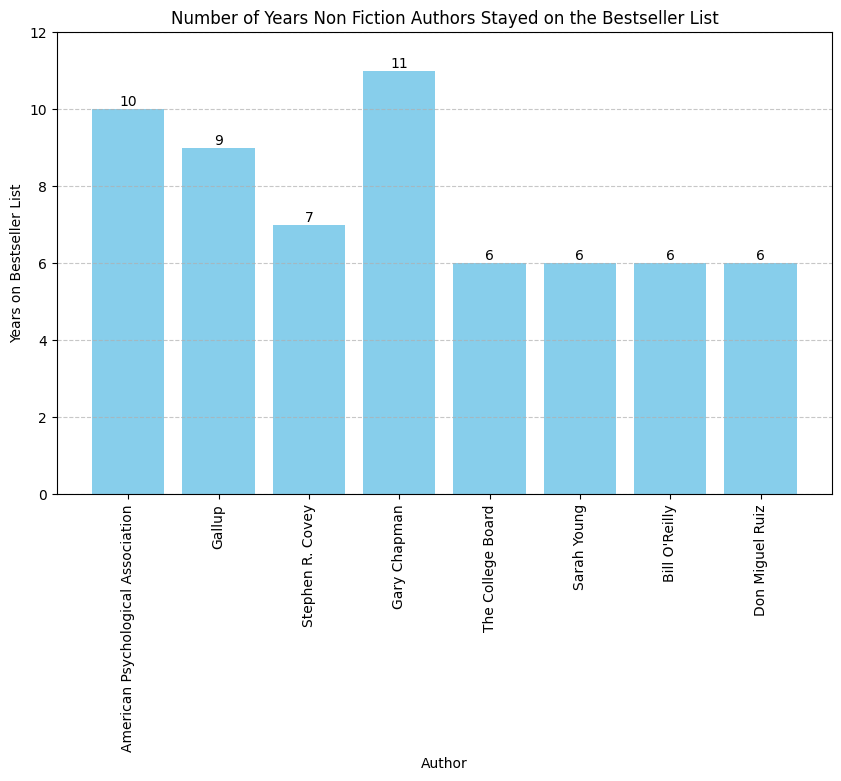

In [71]:
non_fiction_authors = df[df['Genre'] == 'Non Fiction']
plot_author_longevity(non_fiction_authors, label='Non Fiction Authors')

Here we separated non-fiction authors from fiction authors in the dataset. Three of the most-retained non-fiction authors are, in fact, companies like the American Psychological Association, Gallup, and The College Board, rather than individual authors. The companies' success on the bestseller list can likely be attributed to their domination in the area in which they create books for. For example the college board is well reknowned in schools for their SAT, and AP exam preparation materials. Individual non-fiction authors such as Stephen R. Covey, Gary Chapman, Sarah Young, Bill O'Reilly, and Don Miguel Ruiz have also achieved significant longevity on the bestseller list.

Notably for fiction authors, there are only four authors who meet this threshold: Jeff Kinney, Rick Riordan, Dr. Seuss, and Eric Carle, all of whom have popular series they've written.

['Jeff Kinney', 'Rick Riordan', 'Dr. Seuss', 'Eric Carle']


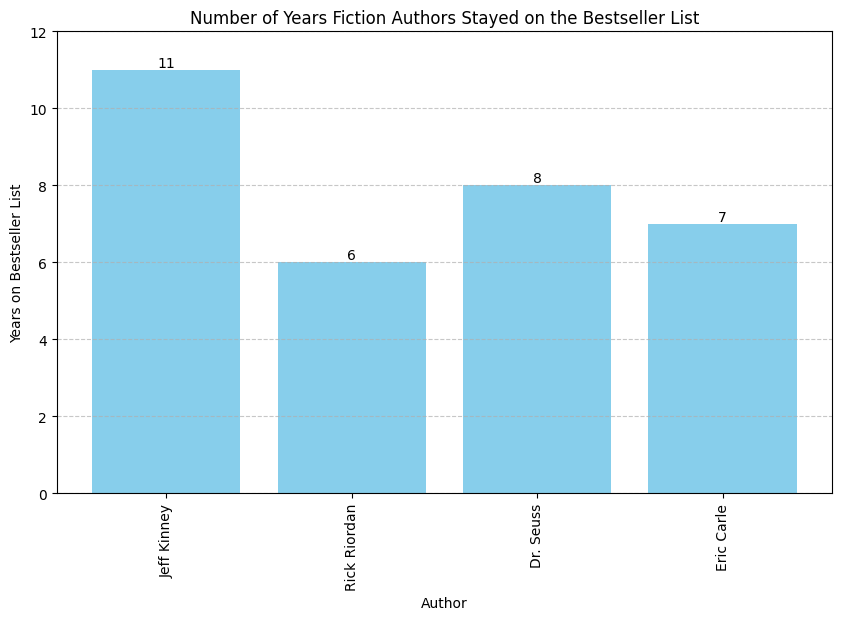

In [72]:
fiction = df[df['Genre'] == 'Fiction']
plot_author_longevity(fiction, label='Fiction Authors')

These authors have consistently recieved high user ratings contributing to the overall success of their popular series as well.

# Predictions

Determining the correlation between price and popularity, while also predicting the trend of the genre throughout the future years (2020 and so forth).

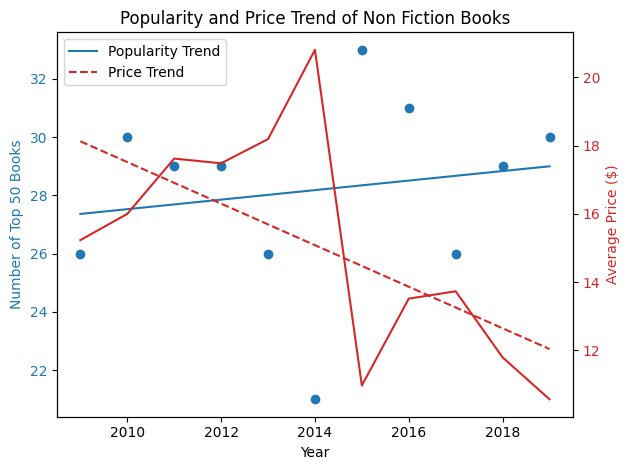

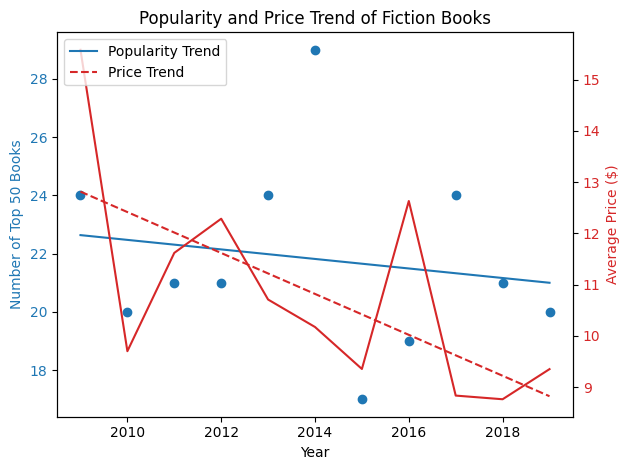

In [15]:
from FinalProjectCode import trend_nf, trend_f
trend_nf(df)
trend_f(df)

The idea behind these two graphs is to visualize how prices and reviews, just as it was predicted in the correlation matrix, affect one another (more radically in the Non-Fiction section than Fiction), as we can see the major shift in popularity and prices in 2014.